<a href="https://colab.research.google.com/github/pizzapuppies/Usif_FYP_code/blob/main/raw_data(complex)%20CNN_for_dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

predictive ANN for solution


In [13]:
! pip install impedance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from google.colab import drive
import pandas as pd 
import os
import tensorflow as tf
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import random

import sys
from impedance.models.circuits import Randles

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
mat = [[1,2,3],[4,5,6]]

def split23(li):
  g = []
  for i in range(1,len(li),3):
    g.append(li[i:i+3])
  return g

In [16]:
X = []

with open('/content/gdrive/My Drive/FYP Dengue data - Sheet1.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  line_count = 0
    
  for i in csv_reader:
    if line_count == 0:
      for j in range(len(split23(i))):
        X.append([])
      
    line_count += 1
    if i[0] in ["index","conc","label"]:
            if i[0] == "label":
              y = split23(i)
    else:
      li = split23(i)
      
      for ind,dat in enumerate(li):
        com = list(map(float,dat[1:]))
        X[ind].append(complex(com[0],com[1]))
        



for i,li in enumerate(y):
  if li[0] == "1":
    y[i] = 1
  else:
    y[i] = 0

X = np.array(X)
y = np.array(y)

temp = list(zip(X, y))
random.shuffle(temp)
X, y = zip(*temp)
X, y = list(X), list(y)
X = np.array(X).astype('complex')
y = np.array(y)

impedance py did the math but did not output the parameters

In [17]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X,y, test_size=0.10)

X_train = np.asarray(X_train).astype('complex')
X_test = np.asarray(X_test).astype('complex')
Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
print(X_train[0])
print(Y_train[0])

print("\nTrain Test Dimensions:\n------------------------------------")
print("shape of training set",X_train.shape, Y_train.shape)
print("shape of testing set",X_test.shape, Y_test.shape)

[ 415.179   +5.83499j  415.073   +4.75574j  415.271   +3.7025j
  418.681   +8.65149j  417.649   +6.74233j  417.153   +5.98543j
  416.97    +5.66394j  417.008   +5.98184j  416.871   +6.75386j
  417.272   +7.86841j  418.197   +9.57531j  419.022  +11.7706j
  420.092  +14.5292j   421.406  +18.0516j   422.983  +22.4553j
  424.837  +28.0414j   426.946  +35.1557j   429.221  +44.3509j
  431.58   +56.3431j   434.238  +72.4773j   437.278  +94.1316j
  441.309 +123.166j    447.313 +162.029j    456.571 +213.945j
  470.825 +281.991j    493.845 +370.699j    528.735 +484.23j
  586.772 +628.388j    677.189 +806.629j    816.265+1018.37j
 1024.87 +1257.01j    1315.49 +1500.01j    1701.98 +1710.21j
 2161.49 +1847.79j    2650.48 +1882.3j     3124.29 +1822.62j
 3538.56 +1692.71j    3874.28 +1526.82j    4145.42 +1363.14j
 4373.84 +1226.47j    4554.59 +1108.83j    4714.33 +1043.52j
 4864.71 +1000.46j    5018.51  +984.901j   5170.03 +1000.86j
 5327.74 +1052.18j       0.      +0.j         0.      +0.j
    0.   

In [18]:
from tensorflow import keras



In [19]:
#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

In [20]:
#Add the first hidden layer
model.add(keras.layers.Dense(128,         #Number of nodes
                        input_shape=(50,1), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(tf.keras.layers.Conv1D(
    2,3,activation='relu'
))
model.add(tf.keras.layers.Flatten())

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-3',
                              activation='relu'))



#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-4',
                              activation='relu'))




In [21]:
model.add(keras.layers.Dense(1,
                             name='Output-Layer',
                             activation='sigmoid'))

#model.summary()

In [22]:
#Compile the model with loss & metrics
model.compile(loss= tf.keras.losses.BinaryCrossentropy() ,
              metrics=['accuracy'])

In [23]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=10
#Set number of epochs
EPOCHS=20
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")
#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Training Progress:
------------------------------------
Epoch 1/20
10/10 [==============================] - 2s 43ms/step - loss: 3.8575 - accuracy: 0.4400 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 0s 14ms/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 0s 13ms/step - loss: 0.6938 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 0s 16ms/step - loss: 0.6935 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.510

In [24]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
z = model.evaluate(X_test,Y_test)
print("The accuracy of the model is ",round(z[1]*100)," %")


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 46ms/step - loss: 0.6956 - accuracy: 0.4286
The accuracy of the model is  43  %



Accuracy during Training :
------------------------------------


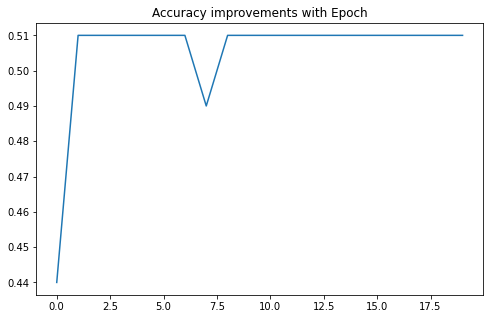

In [25]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()